## Pesquisa Operacional

### Semana 2 Aula 2 - Região Fativel, Método Gráfico, Manipulação de um PPL
#### Daniel de Araújo Pereira

OK, temos a forma canonica, a função objectivo é um vetor gradiente, que indica para onde a função cresce e usaremos isso para calcular o método gráfico (é a derivada parcial, em cada variavel, que no fim das contas, são as coordenadas do custo por que ta tudo em primeiro grau)

Segundo o gradiente, cada curva de nivel desse gradiente vai aumentar a função objectivo, então se você quer max. segue o sentido, se min, contrário a.


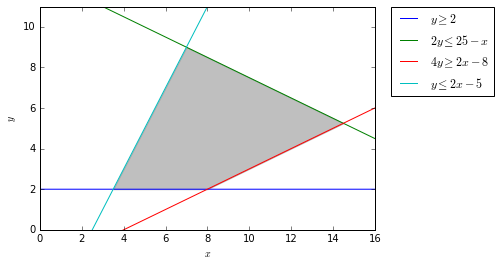

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
x = np.linspace(0, 20, 2000)
y1 = (x*0) + 2
y2 = (25-x)/2.0
y3 = (2*x-8)/4.0
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Ok, now let's add the gradient vector to this problem, say [2, 1], the solution is probably the intersection of the red and green line (still don't know how to plot the gradient countur lines, but it is fairly obvious)

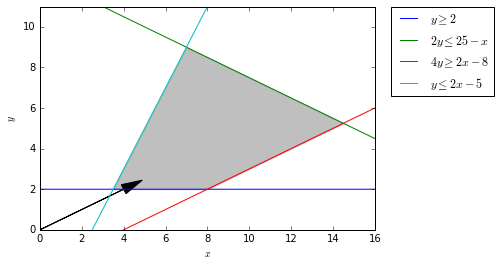

In [19]:
x = np.linspace(0, 20, 2000)
y1 = (x*0) + 2
y2 = (25-x)/2.0
y3 = (2*x-8)/4.0
y4 = 2 * x -5
gradient = 0.5*x

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.arrow(0, 0, 4, 2, head_width=0.5, head_length=1, fc='k', ec='k')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
c = [-2, -1]
A = [[0, -1],
     [1, 2],
     [2, -4],
     [-2, 1]
    ]
b = [-2, 25, 8 , -5]

from scipy.optimize import linprog

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
print(res)

     fun: -34.25
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  3.25,   0.  ,   0.  ,  18.75])
  status: 0
 success: True
       x: array([ 14.5 ,   5.25])


This problem starts in an infeasible region! So we must first of all create some virtual variables to have the problem start in a feasible region! Otherwise we still have constraints working (like we see in the slacks)

In [24]:
c = [-2, -1, 100000]
A = [[0, -1, 1],
     [1, 2, 1],
     [2, -4, 1],
     [-2, 1, 1]
    ]
b = [-2, 25, 8 , -5]

from scipy.optimize import linprog

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
print(res)

     fun: -34.25
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  3.25,   0.  ,   0.  ,  18.75])
  status: 0
 success: True
       x: array([ 14.5 ,   5.25,   0.  ])


If we take the $2y\leq25-x$ restriction out, we have and unbounded problem

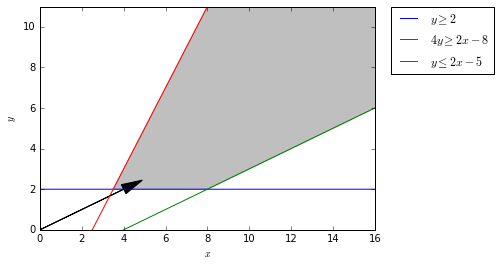

In [14]:
x = np.linspace(0, 20, 2000)
y1 = (x*0) + 2
y2 = (25-x)/2.0
y3 = (2*x-8)/4.0
y4 = 2 * x -5
gradient = 0.5*x

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.arrow(0, 0, 4, 2, head_width=0.5, head_length=1, fc='k', ec='k')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = y4
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can also have a solution that is contained in a line. This happens when the gradient is perpendicular to the bounding restriction. We call it multiple solutions. The solver usually gives one of the two points that contains the line, normally the first coordinate it hits. So, how the hell do we know if the solver returns a multiple solution?

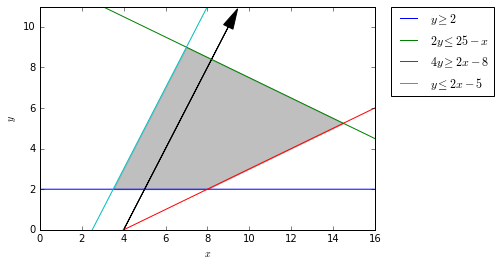

In [24]:
x = np.linspace(0, 20, 2000)
y1 = (x*0) + 2
y2 = (25-x)/2.0
y3 = (2*x-8)/4.0
y4 = 2 * x -5
gradient = 0.5*x

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.arrow(4, 0, 5, 10, head_width=0.5, head_length=1, fc='k', ec='k')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [25]:
# Ok, but what will the solver return in that case?
# probably a non 0 slack

cost = []

We can also have an optimal radious were the solution is in an infinite line

## Manipulando um PL

Adicionar variaveis de folga ou de excesso para que o problema fique em igualdades na forma canonica

Pro exemplo se queremos algo

40x1 + 10x2 + 6x3 ≤ 55.0,
40x1 + 10x2 + 6x3 ≥ 32.5

Temos que adicionar variaveis de folga para que tenhamos:

40x1 + 10x2 + 6x3 + x5 = 55.0,
40x1 + 10x2 + 6x3 − x6 = 32.5.

onde x5 pede o quanto falta para o max
e o x6 quanto falta para o min